# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Anjali Singh<br>
Roll Number: 2020102004

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [3]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->

Implementing the linear regression by taking a weight vector (and the usage of the intercept term), wherein I'll fit the training data using the gradient descent algorithm which helps reduce the model loss. I'll be using a specific value of learning rate for the LR model with whihc I'll be changing/updating the weights at each step of gradient descent. 

- MSE converges, i.e doesn't change the magnitude 
- Or <b> num_epochs </b> are done  

Once this process is over, the weights have been trained on the data and can be used for prediction.

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

<b> Linear Regression Model </b>

$$ 
y_i = x_i\beta + \epsilon_{i}
$$
where $y_i$ is dependent variable, $x_i$ is vector of regressors, $\beta$ is a vector of regression coefficients and $\epsilon_i$ is an unobservable error term.
<br>

Quadratic loss: results in MSE
$$ MSE(y, y_{pred}) = 1/n((y_i - y_{pred})^T(y_i - y_{pred})) $$
$$ Loss =  MSE(f) = 1/n.\sum_{i=1}^{i=n}(y_i - f(x_i))^2 $$

In [5]:
# implement Linear Regression

class LinearRegressor:
    def __init__(self, lr = 1):
        self.lr = lr
        self.coef = None
        self.intercept = None
        self.mse = None
        self.mse_list = [1e7]
        self.mse_conv = 1e-7
        self.X = None
        self.y = None

    # np.matmul: used for matrix product of two arrays
    # np.dot: dot product of two arrays
    # @: class decorators: function that takes another function as an argument, adds some
    # functionalities, and returns the modified function

    def lossFunction(self):
        self.mse = ((np.dot(self.X, self.coef) - self.y).T@(np.matmul(self.X, self.coef) - self.y)) / (2 * self.X.shape[0])
        
    def gradient(self):
        grad = (self.X.T@(np.dot(self.X, self.coef) - self.y)) / (self.X.shape[0])
        
        return grad 
        
    # fit function: will do the actual learning of LR model, helps in finding the weights
    def fit(self, X, y, num_epochs = 10):
        self.X = np.array(X, dtype = 'float32')
        self.X = np.append(self.X, np.ones((self.X.shape[0], 1)), axis = 1)
        self.y = np.array(y, dtype = 'float32')
            
        self.coef = np.random.rand(self.X.shape[1])

        for _ in range(num_epochs):
            grad = self.gradient()
            self.coef = self.coef - self.lr * grad
            self.lossFunction()
            if (abs(self.mse - self.mse_list[-1]) < self.mse_conv):
                break
            self.mse_list.append(self.mse)
        self.intercept = self.coef[-1]
    
    # returns the output of our model
    def predict(self, X):
        X_vec = np.array(X, dtype='float32')
        X_vec = np.append(X_vec, np.ones((X_vec.shape[0], 1)), axis=1)
        preds = np.matmul(X_vec, self.coef)
        return preds

Text(0, 0.5, 'MSE')

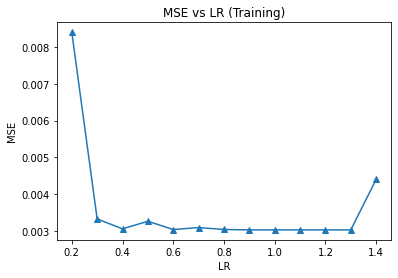

In [6]:
lr_list = np.arange(0.2, 1.5, 0.1)
mse_list = []
for lr in lr_list:
    regressor = LinearRegressor(lr=lr)
    regressor.fit(x_train, y_train, num_epochs=100)
    mse_list.append(regressor.mse)

plt.plot(lr_list, mse_list, marker= '^')
plt.title("MSE vs LR (Training)")
plt.xlabel("LR")
plt.ylabel("MSE")

Text(0, 0.5, 'MSE')

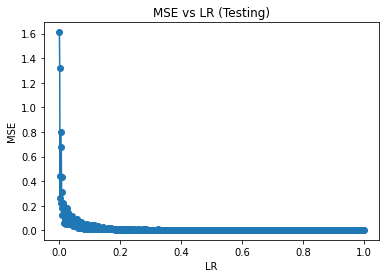

In [7]:
lr_list = np.arange(0.0, 1.000, 0.001)
y_test = np.array(y_test, dtype='float32')
mse_list = []

for i in (range(len(lr_list))):
    regressor = LinearRegressor(lr=lr_list[i])
    regressor.fit(x_train, y_train, num_epochs = 100)
    preds = regressor.predict(x_test)
    mse_list.append(((preds - y_test).T@(preds - y_test)) / (preds.shape[0]))

plt.plot(lr_list, mse_list, marker = 'o')
plt.title("MSE vs LR (Testing)")
plt.xlabel("LR")
plt.ylabel("MSE")

In [8]:
# Calculating the best learning rate by finding the minimum MSE from the list of MSE 
best_lr = lr_list.tolist()[mse_list.index(min(mse_list))]
min_mse = min(mse_list)

print("Best Learning Rate (LR):", best_lr, "and Minimum MSE:", min_mse)

Best Learning Rate (LR): 0.498 and Minimum MSE: 0.002898457603056431


In [9]:
regressor_bestMSE = LinearRegressor(lr = 1.2000000000000004)
regressor_bestMSE.fit(x_train, y_train, num_epochs = 10000)

weights = regressor_bestMSE.coef[:-1]
intercept = regressor_bestMSE.intercept

print("Weights:", weights, "\nIntercept:", intercept)

Weights: [-0.02273671 -0.14398621  1.52131945  0.62408177] 
Intercept: 1.615997671133105


4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

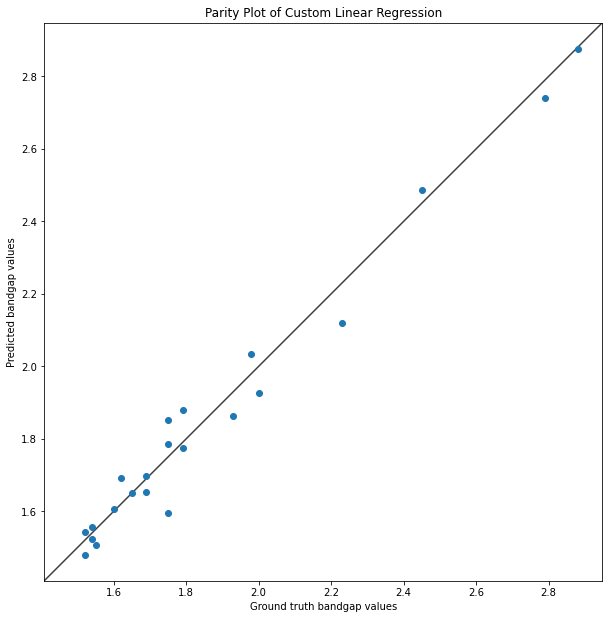

In [10]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

y_pred = regressor.predict(x_test)
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->

<b>Ridge regression</b> is a linear regression variation to estimate the coefficients of multi-regression models in situations where the independent variables are highly correlated. <br>
It slightly changes the cost function for enhancing the regular linear regression, to reduce overfitting. 

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

$ y_{pred} = (x_b.\theta) $ 
<br>
$ \theta = \begin{bmatrix} \theta_o \\ \theta_1 \end{bmatrix} $ and  
$ x_b = \begin{bmatrix} 1 \\ x \end{bmatrix} $

In [11]:
def normal_eq_ridge(X, y, alpha):
    intercept_ones = np.ones((len(X), 1))
    X_b = np.c_[intercept_ones, X]
    I = np.identity(X_b.shape[1])
    I[0][0] = 0
    # normal equation
    theta_optimal = np.linalg.inv(X_b.T.dot(X_b) + alpha*I).dot(X_b.T).dot(y)

    return theta_optimal

def mse(y, y_predicted):
    error = y-y_predicted
    loss = 1/(y.shape) * np.dot(error.T, error)
    return loss

def ridgeMSE(y, y_predicted, alpha, theta):
    mse = mse(y, y_predicted)
    ridge_mse = mse(y, y_predicted) + alpha * np.dot(theta,theta)
    return ridge_mse


In [12]:
import sklearn

theta_ridge = normal_eq_ridge(x_train, y_train, 1)
print(theta_ridge)

[ 1.73812028 -0.03173165 -0.23024632  1.25025552  0.49721914]


The parameter `alpha` is the regularization factor. It regularizes the weights of the regression model and helps in reducing overfitting. We can see from the graph below that the MSE increases for increasing `alpha`. By changing the values of `alpha`, we control the penalty term. The higher its value, the bigger is the penalty and thereby, the magnitude of the coefficients get reduced. This implies that there are not many outliers in the given data and regularization would not help. 

Text(0, 0.5, 'MSE')

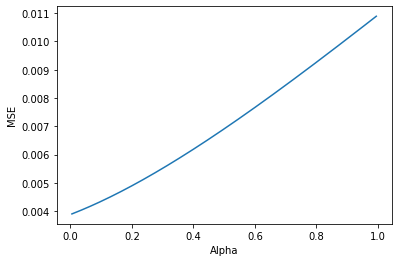

In [13]:
# implement Ridge regression and make a table where you explore the effects of different values of `alpha`
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

alpha = np.arange(0.005, 1, 0.005)
mse_list = []
for i in alpha:
    clf = Ridge(alpha = i)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    mse_list.append(mean_squared_error(y_test, preds))

plt.plot(alpha, mse_list)
plt.xlabel('Alpha')
plt.ylabel('MSE')

### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

<b>Lasso Regression </b> is a regularization technique used over other linear regression methods for a more accurate prediction. In this model, the data points are shrunk towards a central point as mean. 

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

The `alpha` here is a regularization factor. When `alpha` = 0, lasso regression produces the same coefficients as a linear regression. And when `alpha` is huge, all coefficients tend to zero. 

Text(0, 0.5, 'MSE')

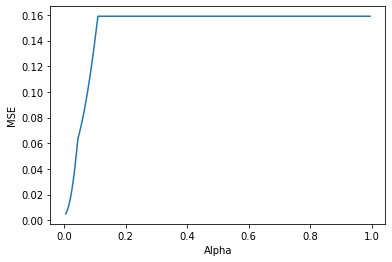

In [14]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

alpha = np.arange(0.005, 1, 0.005)
mse_list = []
for aph in alpha:
    clf = Lasso(alpha=aph)
    clf.fit(x_train, y_train)
    preds = clf.predict(x_test)
    mse_list.append(mean_squared_error(y_test, preds))

plt.plot(alpha, mse_list)
plt.xlabel('Alpha')
plt.ylabel('MSE')